# Computational Physics - Exercise 4: Variational Monte Carlo methods

# STEP 2 : Two He atoms in a harmonic trap

In this second step we deal with the following Hamiltonian:
$$
\hat{H} = \displaystyle \sum_{i = 1}^{2} \left[-\frac{\hbar^{2}}{2m} \nabla^{2}_{i} + \frac{1}{2}m\omega^{2}r^{2}_{i} \right] + V(r_{12})
$$
for two He atoms confined in a harmonic external potential well $ V_{ext}(r) = \displaystyle \sum_{i = 1}^{2} \frac{1}{2}m\omega^{2}r^{2}_{i} $ at $ T = 0 \hspace{0.1 cm} \rm{K} $. The two bosonic atoms interact each other by means of the usual Lennard-Jones potential:
$$
V_{LJ}(r) = 4 \epsilon \left[\left(\frac{\sigma}{r}\right)^{12} -  \left(\frac{\sigma}{r}\right)^{6}\right],
$$
so that in the above Hamiltonain this interacting potential is evaluated at the particular value $ r = r_{12} $, which is the relative distance between the two atoms.
We now assume that $ k_{B} = 1 $, thus meaning that all the energy terms are divided by the Boltzmann constant $ k_{B} $ and hence expressed in units of $ \rm{K} $. Moreover we suppose that lengths are expressed in units of $ \rm{\AA} $, so that in these units we have that $ \epsilon = 10.4 \hspace{0.1 cm} \rm{K} $ and $ \sigma = 2.556 \hspace{0.1 cm} \AA $.

## 2.1) Kinetic energy and trap potential in the new units

In this subsection we want to compute the prefactor $ \hbar^{2}/2m $ (appearing in the kinetic energy term of the above Hamiltonian $ \hat{H} $) in the aforestated system of units. 
More specifically, in the International System of Units $ \left( \rm{SI} \right) $, we have:
$$
\left[\frac{\hbar^{2}}{2m} \right] = \frac{\rm{J}^{2} \rm{s}^{2}}{\rm{kg}} = \frac{\rm{J}^{2} \rm{s}^{2} \rm{m}^{2}}{\rm{J} \rm{s}^{2}} = \rm{J} \rm{m}^{2}.
$$
Since $ 1 \hspace{0.1 cm} \rm{\AA} = 10^{-10} \hspace{0.1 cm} \rm{m}^{2} $, then we get:
$$
\left[\frac{\hbar^{2}}{2m} \right] = 10^{20} \hspace{0.1 cm} \rm{J} \rm{\AA}^{2}.
$$
By assuming to write down all the involved physical quantities and constants  up to the fifth significant figure, we note that the mass of the Helium-4 is given by $ m = 4.0026 \hspace{0.1 cm} \rm{u} \equiv 4.0026 \times 1.6605 \times 10^{-27} \hspace{0.1 cm}\rm{Kg} $ and we remember that $ \hbar = 1.0546 \times 10^{-34} \hspace{0.1 cm} \rm{J} \rm{s} $ and that $ k_{B} = 1.3806 \times 10^{-23} \hspace{0.1 cm} \rm{J}/\rm{Kg} $.
At this point we can divide by the constant $ k_{B} $ in order to express energies in $ \rm{K} $, thus yielding:
$$
\frac{\hbar^{2}}{2m} = \frac{(1.0546)^{2} \times 10^{-68} \times 10^{20}}{2 \times 4.0026 \times 1.6605 \times 10^{-27} \times 1.3806 \times 10^{-23}} \hspace{0.1 cm} \rm{K} \rm{\AA^{2}} = 6.0603 \hspace{0.1 cm} \rm{K} \rm{\AA^{2}}.
$$
We have also to consider the external harmonic potential trap term contained in $ \hat{H} $, so that in the International System of Units $ \left( \rm{SI} \right) $ have:
$$
[m \omega^{2}] = \rm{kg} \times s^{-2} = \frac{\rm{J} \times \rm{s}^{2}}{\rm{m}^{2}} \times \rm{s}^{-2} = \frac{\rm{J}}{\rm{m^{2}}}.
$$
The trap is characterized by a natural harmonic oscillation length $ a_{0} = \sqrt{\hbar/m \omega} = 5 \hspace{0.1 cm} \rm{\AA} $, so that we can write:
$$
\frac{1}{2}m\omega^{2} = \frac{m\hbar^{2}}{2m^{2}a_{0}^{4}} = \frac{\hbar^{2}}{2m a_{0}^{4}}.
$$
We can finally exploit the previous expression obtained for the prefactor $ \hbar^{2}/2m $ (in units of $ \rm{K} \rm{\AA^{2}} $), so that:
$$
\frac{1}{2}m\omega^{2} = \frac{1}{(5 \hspace{0.1 cm} \rm{\AA})^{4}} 6.0603 \hspace{0.1 cm} \rm{K} \rm{\AA^{2}} = 0.0097 \hspace{0.1 cm} \frac{K}{\AA^{2}}.
$$

In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import scipy.constants as sp
import math
from pylab import xlabel,ylabel
from numpy.random import uniform

In [52]:
# Valori numerici e funzioni per i potenziali

h_bar = 1.0546 * 10**(-34) # h_bar in Js
kB = 1.3806 * 10**(-23) # costante di Blotzmann in J/K
m = 4.0026 * 1.6605 * 10**(-27) # massa 4He in Kg
conversion_kin = 10**(20) / kB # conversione per avere K A^2
prefactor_kin = (h_bar**2 * conversion_kin) / (2 * m) # prefattore kin

a0 = 5 # lunghezza oscillatore armonico in A
prefactor_ext = prefactor_kin / (a0**4) # prefattore ext 

eps = 10.4 # epsilon di LJ in K
sigma = 2.556 # sigma di LJ in A

def v_ext(x,y,z):  # trappola armonica
    r = x**2 + y**2 + z**2
    v = prefactor_ext * r
    return v

def v_LJ(x1,y1,z1,x2,y2,z2):  # potenziale di Lennard-Jones
    r = np.sqrt( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )
    v = 4 * eps * ( (sigma/r)**12 - (sigma/r)**6 )
    return v

## 2.2) Analytic expression for the local energy

We now introduce a trial wave function of the following form:
$$
\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}}) = \exp{\left[-\frac{\vec{r_{1}}^{2} + \vec{r_{2}}^{2}}{2 \alpha^{2}}\right]} \exp{\left[-\left(\frac{\beta}{|\vec{r_{1}} - \vec{r_{2}}|} \right)^{5}\right]}.
$$
Given this expression of $ \Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}}) $ we can write the local energy as:
$$
E_{L,\alpha,\beta}(\vec{r_{1}},\vec{r_{2}}) = -\frac{\hbar^{2}}{2m} \frac{\nabla_{1}^{2}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}}) + \nabla_{2}^{2}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} + \frac{1}{2}m\omega^{2}(r_{1}^{2} + r_{2}^{2}) + V(r_{12}).
$$
In order to find out the explicit expression for the kinetic term, we can firstly rewrite the two exponential factors appearing in the trial wave function in Cartesian coordinates, i.e.:
$$
\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}}) = f \cdot g,
$$
where
$$
f \doteq exp{\left[-\frac{x_{1}^{2} + y_{1}^{2} + z_{1}^{2} + x_{2}^{2} + y_{2}^{2} + z_{2}^{2}}{2 \alpha^{2}} \right]}
$$
while
$$
g \doteq exp{ \{- \beta^{5} [ (x_{1} - x_{2})^{2} + (y_{1} - y_{2})^{2} + (z_{1} - z_{2})^{2}]^{-5/2} \}}.
$$
We now compute the gradient (with respect to the first particle) of the function $ f $, thus obtaining:
$$
\vec{\nabla}_{1} f = -\frac{f}{\alpha^{2}}(x_{1} \hat{x_{1}} + y_{1} \hat{y_{1}} + z_{1} \hat{z_{1}} ).
$$
Similarly in the case of the function $ g $ we have:
$$
\vec{\nabla}_{1} g = g \frac{5 \beta^{5}}{|\vec{r_{1}} - \vec{r_{2}}|^{7}}[(x_{1} - x_{2}) \hat{x_{1}} + (y_{1} - y_{2}) \hat{y_{1}} + (z_{1} - z_{2}) \hat{z_{1}}].
$$
For symmetry considerations we have in the case of the function $ f $ for the particle 2:
$$
\vec{\nabla}_{2} f = -\frac{f}{\alpha^{2}}(x_{2} \hat{x_{2}} + y_{2} \hat{y_{2}} + z_{2} \hat{z_{2}} )
$$
while concerning the function $ g $: 
$$
\vec{\nabla}_{2} g = -\vec{\nabla}_{1} g.
$$
In order to write down the Laplacians, we remember that $ \nabla^{2}{(f \cdot g)} = f \nabla^{2}g + 2 \vec{\nabla}f \cdot \vec{\nabla}g + g \nabla^{2} f $.
As a result, by computing the product of the two gradients for both particles we get:
$$
\vec{\nabla_{1}}f \cdot \vec{\nabla_{1}}g = -fg \frac{5 \beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}} [r_{1}^{2} - x_{1}x_{2} - y_{1}y_{2} - z_{1}z_{2}]
$$
and
$$
\vec{\nabla_{2}}f \cdot \vec{\nabla_{2}}g = -fg \frac{5 \beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}} [r_{2}^{2} - x_{1}x_{2} - y_{1}y_{2} - z_{1}z_{2}].
$$
We proceed with the computation of the Laplacians by exploiting the fact that in general $ \nabla^{2} = \vec{\nabla} \cdot \vec{\nabla} $, so that:
$$
\nabla_{1}^{2} f = -\frac{3}{\alpha^{2}} f
$$
and
$$
\nabla_{1}^{2} g = 3g \frac{5 \beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}}
$$
in the case of the particle 1, while for the particle 2 we get:
$$
\nabla_{2}^{2} f = \nabla_{1}^{2} f
$$
and
$$
\nabla_{2}^{2} g = \nabla_{2}^{2} f.
$$
Finally we have to calculate $ \nabla_{1}^{2}(f \cdot g) $ and  $ \nabla_{2}^{2}(f \cdot g) $. For the former we have:
 $$
 \nabla_{1}^{2}(f \cdot g) = fg \frac{15 \beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}} - fg \frac{10 \beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}}[r_{1}^{2} - x_{1}x_{2} - y_{1}y_{2} - z_{1}z_{2}] - fg \frac{3}{\alpha^{2}}
 $$
 and analogously for the latter we obtain:
  $$
 \nabla_{1}^{2}(f \cdot g) = fg \frac{15 \beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}} - fg \frac{10 \beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}}[r_{2}^{2} - x_{1}x_{2} - y_{1}y_{2} - z_{1}z_{2}] - fg \frac{3}{\alpha^{2}}.
 $$
After some other manipulations we finally write:
$$
\frac{\nabla_{1}^{2}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}}) + \nabla_{2}^{2}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} = \frac{1}{\alpha^{2}} \left[\frac{(\vec{r_{1}}^{2} + \vec{r_{2}}^{2})}{\alpha^{2}} - 6 \right] - 10 \frac{\beta^{5}}{\alpha^{2}|\vec{r_{1}}^{2} - \vec{r_{2}}^{2}|^{5}} + \frac{5 \beta^{5}}{|\vec{r_{1}} - \vec{r_{2}}|^{7}} \left(\frac{10 \beta^{5}}{|\vec{r_{1}} - \vec{r_{2}}|^{5}} - 14 \right).
$$
There is an alternative expressions of the kinetic energy term:
$$
\frac{\hbar^{2}}{2m} \displaystyle \sum_{i=1}^{2} \frac{\vec{\nabla}_{i} \Psi_{T}^{*}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} \cdot \frac{\vec{\nabla}_{i} \Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}.
$$
In our case, neglecting for the sake of simplicity the $ \hbar^{2}/2m $ prefactor, we have
$$
\displaystyle \sum_{i=1}^{2} \frac{\vec{\nabla}_{i} \Psi_{T}^{*}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} \cdot \frac{\vec{\nabla}_{i} \Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}  = \left| \frac{\vec{\nabla}_{1} (fg) }{fg} \right|^{2} + \left| \frac{\vec{\nabla}_{2} (fg) }{fg} \right|^{2}.
$$
Accordingly we have:
$$
\vec{\nabla}_{1} (fg) = f \vec{\nabla}_{1} g + g \vec{\nabla}_{1} f = fg \frac{5 \beta^{5}}{|\vec{r_{1}} - \vec{r_{2}}|^{7}}[(x_{1} - x_{2})\hat{x_{1}} + (y_{1} - y_{2})\hat{y_{1}} + (z_{1} - z_{2})\hat{z_{1}}] - fg \frac{(x_{1}\hat{x_{1}} + y_{1}\hat{y_{1}} + z_{1}\hat{z_{1}})}{\alpha^{2}}.
$$
Hence we can write:
$$
\left| \frac{\vec{\nabla}_{1} (fg) }{fg} \right|^{2} = \frac{25\beta^{10}}{|\vec{r_{1}} - \vec{r_{2}}|^{12}} + \frac{\vec{r_{1}}^{2}}{\alpha^{4}} - \frac{10\beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}}[\vec{r_{1}}^{2} - x_{1}x_{2} - y_{1}y_{2} - z_{1}z_{2}].
$$
In the same way we proceed with the calculation of the second term relative to the particle 2. In other words we have:
$$
\vec{\nabla}_{2} (fg) = f \vec{\nabla}_{2} g + g \vec{\nabla}_{2} f = -fg \frac{5 \beta^{5}}{|\vec{r_{1}} - \vec{r_{2}}|^{7}}[(x_{1} - x_{2})\hat{x_{1}} + (y_{1} - y_{2})\hat{y_{1}} + (z_{1} - z_{2})\hat{z_{1}}] - fg \frac{(x_{2}\hat{x_{2}} + y_{2}\hat{y_{2}} + z_{2}\hat{z_{2}})}{\alpha^{2}}
$$
from which:
$$
\left| \frac{\vec{\nabla}_{2} (fg) }{fg} \right|^{2} = \frac{25\beta^{10}}{|\vec{r_{1}} - \vec{r_{2}}|^{12}} + \frac{\vec{r_{2}}^{2}}{\alpha^{4}} - \frac{10\beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{7}}[\vec{r_{2}}^{2} - x_{1}x_{2} - y_{1}y_{2} - z_{1}z_{2}].
$$
Thus we get:
$$
\left| \frac{\vec{\nabla}_{1} (fg) }{fg} \right|^{2} + \left| \frac{\vec{\nabla}_{2} (fg) }{fg} \right|^{2} = \frac{50 \beta^{10}}{|\vec{r_{1}} - \vec{r_{2}}|^{12}} + \frac{\vec{r_{1}}^{2} + \vec{2_{2}}^{2}}{\alpha^{4}} - \frac{10\beta^{5}}{\alpha^{2}|\vec{r_{1}} - \vec{r_{2}}|^{5}}.
$$
A third method to find out the form of the kinetic energy reads:
$$
-\frac{\hbar^{2}}{4m} \displaystyle \sum_{i=1}^{2} \left[\frac{\nabla_{i}^{2}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} - \left( \frac{\vec{\nabla_{i}}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} \right) \right]
$$
such that in our case becomes (excluding for the sake of simplicity the $ \hbar^{2}/2m $ prefactor):
$$
-\frac{\hbar^{2}}{4m} \displaystyle \sum_{i=1}^{2} \left[\frac{\nabla_{i}^{2}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} - \left( \frac{\vec{\nabla_{i}}\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})}{\Psi_{T}(\alpha,\beta,\vec{r_{1}},\vec{2_{2}})} \right) \right] = -\frac{6}{\alpha^{2}} - \frac{40 \beta^{5}}{|\vec{r_{1}} - \vec{r_{2}}|^{7}}.
$$

In [53]:
# Tre modi differenti per calcolare la parte cinetica dell'energia locale

alpha = a0  # valore iniziale di alpha
beta = sigma  # valore iniziale di beta

def kinetic_term(x1,y1,z1,x2,y2,z2):  # con i laplaciani
    r1 = x1**2 + y1**2 + z1**2
    r2 = x2**2 + y2**2 + z2**2
    r_diff = ( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )**0.5
    factor = 10 * beta**5 / (alpha**2 * r_diff**5)
    risultato = (1/alpha**2) * ((r1+r2)/alpha**2 - 6) - factor + ((10 * beta**5) / r_diff**7) * ((5*beta**5)/r_diff**5 -4 )
    return risultato

def first_part(x1,y1,z1,x2,y2,z2):  # con il prodotto del modulo quadro dei gradinti
    r1 = x1**2 + y1**2 + z1**2
    r2 = x2**2 + y2**2 + z2**2
    r_diff = ( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )**0.5
    factor = 10 * beta**5 / (alpha**2 * r_diff**5)
    risultato = 50 * beta**10 / (r_diff**12) + (r1+r2)/(alpha**4) - factor 
    return risultato

def second_part(x1,y1,z1,x2,y2,z2):  # con la differenza
    r_diff = ( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )**0.5
    risultato = - 6 / alpha**2 - 40 * beta**5 / r_diff**7
    return risultato

## 2.3) Expectation of the local energy via three different methods
In this section we compute the expectation $E_T(\alpha, \beta)$ of the Hamiltonian by using the Metropolis algorithm in the 6-dimensional space of the two atom coordinates. We take as initial values of the parameters $\alpha = a_{0}$ and $\beta = \sigma$.
In order to find the expectation value of the Hamiltonian, we use the Central Limit Theorem. Indeed, we find $\braket{H}$ as the average of the $E_L$ values:
$$
\braket{H} = \dfrac{1}{N} \sum_{i=1}^{N}E_{L_{i}}
$$
and the error as:
$$
(\Delta I )^{2} = \frac{\sigma^{2}(F)}{N} \sum_{\tau=1}^{N}c(F)_{\tau}
$$
where:
$$
\sigma^{2} = \braket{H}^{2} - \braket{H^{2}}
$$
We can also evaluate the correlation coefficient: 
$$
c(F)_{\tau} = \frac{\braket{F(x^{(i)})F(x^{(i+\tau)})} - \braket{F}^{2}}{\sigma^{2}(F)}
$$
In general, it follows an exponential decay: $c(F)_{\tau} \sim e^{- \frac{\tau}{\tau_{c}}}$. Hence, we can take the continuum limit to approximate the sum of the correlation coefficients as an integral:
$$
\sum_{i=1}^{N} c(F)_{\tau} \simeq \int_{0}^{\infty} d \tau e^{- \frac{\tau}{\tau_{c}}} = \tau_{c}
$$
The value of $\tau_{c}$ can be estimated by taking the value of $\tau$ for which the correlation coefficient is $c(F)_{\tau} = 1/e \simeq 0.4$. Finally, the error becomes: 
$$
\Delta I = \sqrt{\frac{\sigma^{2}(F)}{(N-1)} \tau_{c}}
$$
We find results, for the three $E_{L}$ methods, for N = 1000000 and $\Delta = 0.4$:
$\braket{H}_1 = 1.264 \pm 0.005 $ and $\tau_{c1}=47$, $\braket{H}_2 = 1.306 \pm 0.03 $ and $\tau_{c2}=6$, $\braket{H}_3 = 1.306 \pm 0.01 $ and $\tau_{c3}=6$. We note that in the first method we have a more accurate result, but also more correlation than the others. The results are consistent within 3 times the error.

As far as the initial positions of the particles are concerned, we plot the test wavefunction assuming to have the two particles in 1D. At the beginning, one of the two is at the origin, while the other one is at a generic position x. The corresponding wavefunction reads:

$$
\psi_{T}(\alpha,\beta,x) = \exp\left(-\dfrac{x^{2}}{2 \alpha^{2}}\right) \exp\left(-\dfrac{\beta^{5}}{x^{5}}\right)
$$

The maximum of this wavefunction is at 3.896 Angstroms.


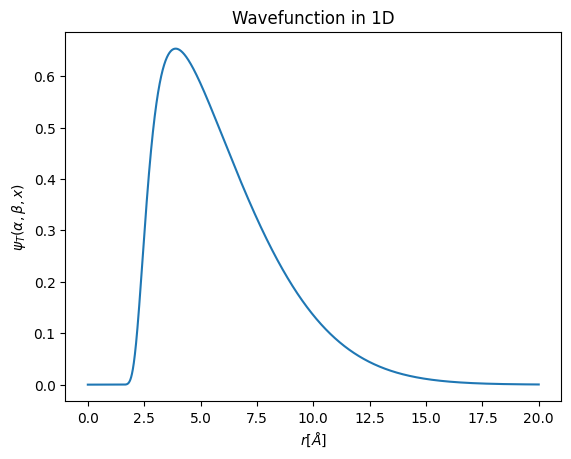

In [18]:
# Plot della funzione d'onda in 1D

alpha = a0
beta = sigma
Npoints = 20000
h = 0.001
xaxis = np.zeros(Npoints,float)
yaxis = np.zeros(Npoints,float)

for i in range(1,Npoints):
    xaxis[i] += h*i
    yaxis[i] += np.exp(-xaxis[i]**2/(2*alpha**2)) * np.exp(-beta**5/(xaxis[i]**5))
maximum = max(yaxis)

for i in range(1,Npoints):
    if(yaxis[i] == maximum):
        maximum_point = i

maximum_position = h * maximum_point

plt.plot(xaxis[1:],yaxis[1:])
plt.xlabel(r'$r [\AA]$')
plt.ylabel(r'$\psi_{T}(\alpha,\beta,x)$')
plt.title('Wavefunction in 1D')

print('The maximum of this wavefunction is at',maximum_position,'Angstroms.')

We can observe that the maximum of this wavefunction is at 3.896 $\AA$. This means that at the beginning, if one particle is at the origin, the second one can be found with the highest probability at a distance of 3.896 $\AA$ from it. Therefore, these can be chosen as the initial conditions for our problem. Translated in three dimension, we assume the initial position of our particles to be respectively (in $\AA$):

$$
\vec{r_{1,i}} = (x_{1,i};y_{1,i};z_{1,i}) = (0,0,0)
$$

$$
\vec{r_{2,i}} = (x_{2,i};y_{2,i};z_{2,i}) = (3.896,3.896,3.896)
$$

In [ ]:
# Metropolis per ciascuna delle 6 coordinate, valutazione dell'energia locale in 3 modi

x0 = 0
delta = 0.4
alpha = a0
beta = sigma
Nstep = 1000000
E_l_2 = np.zeros(Nstep)
E_l_2_check = np.zeros(Nstep)
E_l_2_check2 = np.zeros(Nstep)
x1 = np.zeros(Nstep)
y1 = np.zeros(Nstep)
z1 = np.zeros(Nstep)
x2 = np.zeros(Nstep)
y2 = np.zeros(Nstep)
z2 = np.zeros(Nstep)
psi_vec = np.zeros(Nstep)
x1[0] = x0
y1[0] = x0
z1[0] = x0
x2[0] = x0 + 3.896
y2[0] = x0 + 3.896
z2[0] = x0 + 3.896

for i in range(Nstep-1):
    x1_prop = x1[i] + delta * (uniform(0,1)-0.5)
    y1_prop = y1[i] + delta * (uniform(0,1)-0.5)
    z1_prop = z1[i] + delta * (uniform(0,1)-0.5)
    x2_prop = x2[i] + delta * (uniform(0,1)-0.5)
    y2_prop = y2[i] + delta * (uniform(0,1)-0.5)
    z2_prop = z2[i] + delta * (uniform(0,1)-0.5)

    psi0 = (-(x1[i]**2 + y1[i]**2 + z1[i]**2 + x2[i]**2 + y2[i]**2 + z2[i]**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1[i] - x2[i])**2 + (y1[i] - y2[i])**2 +(z1[i] - z2[i])**2 )**2.5))
    psi = (-(x1_prop**2 + y1_prop**2 + z1_prop**2 + x2_prop**2 + y2_prop**2 + z2_prop**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1_prop - x2_prop)**2 + (y1_prop - y2_prop)**2 +(z1_prop - z2_prop)**2 )**2.5))
        
    ratio = np.exp(psi-psi0)
    if(ratio<1):
        p=ratio
    else: 
        p=1

    epsilon = 1e-8   
    max = 1-epsilon 

    eta_x1 = uniform(0,max)
    if(p>eta_x1):
        x1[i+1] = x1_prop
    else:
        x1[i+1] = x1[i]  

    eta_y1 = uniform(0,max)
    if(p>eta_y1):
        y1[i+1] = y1_prop
    else:
        y1[i+1] = y1[i]  

    eta_z1 = uniform(0,max)
    if(p>eta_z1):
        z1[i+1] = z1_prop
    else:
        z1[i+1] = z1[i]    

    eta_x2 = uniform(0,max)
    if(p>eta_x2):
        x2[i+1] = x2_prop
    else:
        x2[i+1] = x2[i]

    eta_y2 = uniform(0,max)
    if(p>eta_y2):
        y2[i+1] = y2_prop
    else:
        y2[i+1] = y2[i]   

    eta_z2 = uniform(0,max)
    if(p>eta_z2):
        z2[i+1] = z2_prop
    else:
        z2[i+1] = z2[i]
    

    E_l_2[i] = - prefactor_kin * kinetic_term(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i]) + \
        v_ext(x1[i],y1[i],z1[i]) + v_ext(x2[i],y2[i],z2[i]) + v_LJ(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])  # energia locale con i laplaciani
    
    E_l_2_check[i] = prefactor_kin * (first_part(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])) + \
        v_ext(x1[i],y1[i],z1[i]) + v_ext(x2[i],y2[i],z2[i]) + v_LJ(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])  # energia locale con i gradienti

    E_l_2_check2[i] = -1/2 * prefactor_kin * (second_part(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])) + \
        v_ext(x1[i],y1[i],z1[i]) + v_ext(x2[i],y2[i],z2[i]) + v_LJ(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])  # energia locale con il terzo modo
    
    print(i)

In [ ]:
# Coefficienti di correlazione con il primo metodo: solo il numeratore

numtau = 200
cfnum = np.zeros(numtau)
cum = np.zeros(numtau)
for i in range(1,numtau):
    for n in range(Nstep-i):
        cum[i] += E_l_2[n] * E_l_2[n+i]
    cfnum[i] = (1/(Nstep-i)) * cum[i]
    print(i)

In [ ]:
# Coefficienti di correlazione con il secondo metodo: solo il numeratore

numtau = 200
cfnum_check = np.zeros(numtau)
cum_check = np.zeros(numtau)
for i in range(1,numtau):
    for n in range(Nstep-i):
        cum_check[i] += E_l_2_check[n] * E_l_2_check[n+i]
    cfnum_check[i] = (1/(Nstep-i)) * cum_check[i]
    print(i)

In [ ]:
# Coefficienti di correlazione con il terzo metodo: solo il numeratore

numtau = 200
cfnum_check2 = np.zeros(numtau)
cum_check2 = np.zeros(numtau)
for i in range(1,numtau):
    for n in range(Nstep-i):
        cum_check2[i] += E_l_2_check2[n] * E_l_2_check2[n+i]
    cfnum_check2[i] = (1/(Nstep-i)) * cum_check2[i]
    print(i)

In order to find $\tau_{c}$, we look at the coefficient which correspond to a $\tau$ belonging to the interval $[1/e - \delta, 1/e + \delta]$, with $\delta = 10^{-2}$ for the first method and $\delta = 10^{-2}$ for the other two methods.

In [58]:
# Running average, coefficienti di correlazione completi e coefficiente tau_bar = tau_c per trovare energia media ed errore, primo metodo

run_ave_2 = np.zeros(Nstep)

num2 = 0
for n in range(Nstep):
    num2 += E_l_2[n]
    run_ave_2[n] = num2/(n+1)

num22 = 0
for n in range(Nstep):
    num22 += (E_l_2[n])**2

f_ave = run_ave_2[Nstep-1]  # energia media
f2_ave = num22/Nstep  # media dell'energia al quadrato


cftau = np.zeros(numtau)
epsi = 1e-2
for i in range(numtau):
    cftau[i] = (cfnum[i] - f_ave**2)/ (f2_ave - f_ave**2)  # coefficienti di correlazione
    if(cftau[i] < 1/(np.e) + epsi and cftau[i] > 1/(np.e) - epsi):
        tau_bar = i
print('The value of tau_c is',tau_bar)

f_err = (((f2_ave   - f_ave**2)*tau_bar)/(Nstep - 1))**(0.5)  # errore

print('Average energy in K:',f_ave,'with error',f_err)

The value of tau_c is 47
Average energy in K: 1.2638489190850424 with error 0.0047644956144597995


In [59]:
# Running average, coefficienti di correlazione completi e coefficiente tau_bar = tau_c per trovare energia media ed errore, secondo metodo

run_ave_2_check = np.zeros(Nstep)
num2_check = 0
for n in range(Nstep):
    num2_check += E_l_2_check[n]
    run_ave_2_check[n] = num2_check/(n+1)

num22_check = 0

for n in range(Nstep):
    num2_check += E_l_2_check[n]
    num22_check += (E_l_2_check[n])**2

f_ave_check = run_ave_2_check[Nstep-1]  # energia media
f2_ave_check = num22_check/Nstep  # media dell'energia al quadrato


cftau_check = np.zeros(numtau)
epsi_check = 1e-1
for i in range(numtau):
    cftau_check[i] = (cfnum_check[i] - f_ave_check**2)/ (f2_ave_check - f_ave_check**2)  # coefficienti di correlazione
    if(cftau_check[i] < 1/(np.e) + epsi_check and cftau_check[i] > 1/(np.e) - epsi_check):
        tau_bar_check = i
print('The value of tau_c is',tau_bar_check)

f_err_check = ((f2_ave_check - f_ave_check**2)*tau_bar_check/(Nstep - 1))**(0.5)  # errore
print('Average energy in K:',f_ave_check,'with error',f_err_check)

The value of tau_c is 6
Average energy in K: 1.3057507982342895 with error 0.027729535160237122


In [60]:
# Running average, coefficienti di correlazione completi e coefficiente tau_bar = tau_c per trovare energia media ed errore, terzo metodo

run_ave_2_check2 = np.zeros(Nstep)
num2_check2 = 0
for n in range(Nstep):
    num2_check2 += E_l_2_check2[n]
    run_ave_2_check2[n] = num2_check2/(n+1)


num22_check2 = 0
for n in range(Nstep):
    num22_check2 += (E_l_2_check2[n])**2

f_ave_check2 = run_ave_2_check2[Nstep-1]
f2_ave_check2 = num22_check2/Nstep


cftau_check2 = np.zeros(numtau)
epsi_check2 = 1e-1
for i in range(numtau):
    cftau_check2[i] = (cfnum_check2[i] - f_ave_check2**2)/ (f2_ave_check2 - f_ave_check2**2)
    if(cftau_check2[i] < 1/(np.e) + epsi_check2 and cftau_check2[i] > 1/(np.e) - epsi_check2):
        tau_bar_check2 = i
print('The value of tau_c is',tau_bar_check2)

f_err_check2 = ((f2_ave_check2 - f_ave_check2**2)*tau_bar_check2/(Nstep - 1))**(0.5)

print('Average energy in K:',f_ave_check,'with error',f_err_check2)

The value of tau_c is 6
Average energy in K: 1.3057507982342895 with error 0.013355965553716672


Text(0, 0.5, '$E_{L}, \\langle H_{run} \\rangle$')

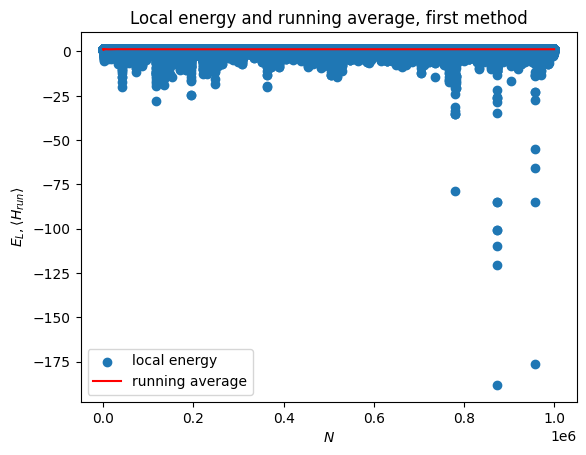

In [61]:
# Plot energia locale e running average, primo metodo

number_of_steps = range(Nstep)
plt.scatter(number_of_steps,E_l_2,label='local energy')
plt.plot(number_of_steps,run_ave_2,color = "r",label='running average')
plt.legend()
plt.title('Local energy and running average, first method')
plt.xlabel(r'$N$')
plt.ylabel(r'$E_{L}, \langle H_{run} \rangle$')

Text(0, 0.5, '$E_{L}, \\langle H_{run} \\rangle$')

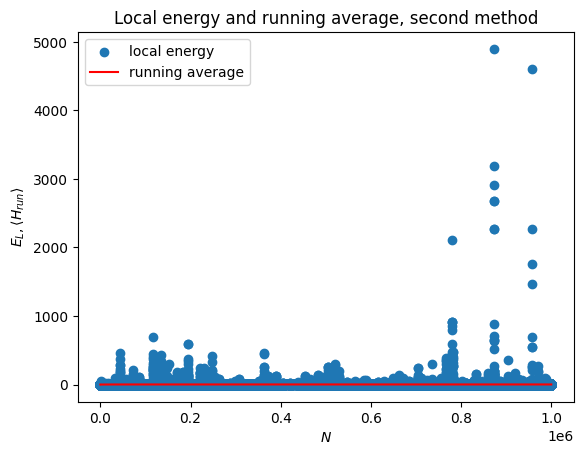

In [62]:
# Plot energia locale e running average, secondo metodo

plt.scatter(number_of_steps,E_l_2_check,label='local energy')
plt.plot(number_of_steps,run_ave_2_check,color = "r",label='running average')
plt.legend()
plt.title('Local energy and running average, second method')
plt.xlabel(r'$N$')
plt.ylabel(r'$E_{L}, \langle H_{run} \rangle$')

Text(0, 0.5, '$E_{L}, \\langle H_{run} \\rangle$')

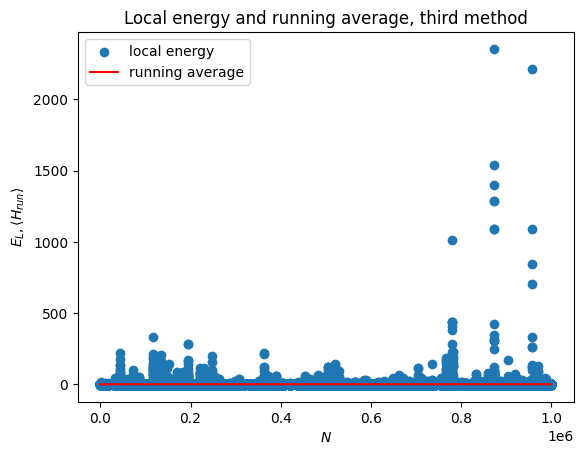

In [63]:
# Plot energia locale e running average, terzo metodo

plt.scatter(number_of_steps,E_l_2_check2,label='local energy')
plt.plot(number_of_steps,run_ave_2_check2,color = "r",label='running average')
plt.legend()
plt.title('Local energy and running average, third method')
plt.xlabel(r'$N$')
plt.ylabel(r'$E_{L}, \langle H_{run} \rangle$')

Text(0, 0.5, '$c(F)_{\\tau}$')

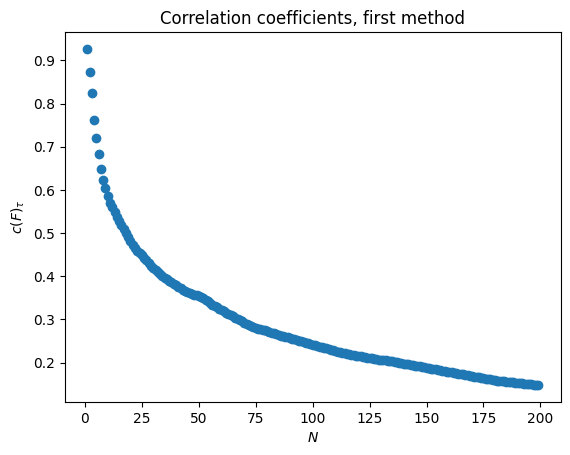

In [64]:
# Plot coefficienti di correlazione, primo metodo

plt.scatter(range(1,numtau),cftau[1:])
plt.title('Correlation coefficients, first method')
plt.xlabel(r'$N$')
plt.ylabel(r'$c(F)_{\tau}$')

Text(0, 0.5, '$c(F)_{\\tau}$')

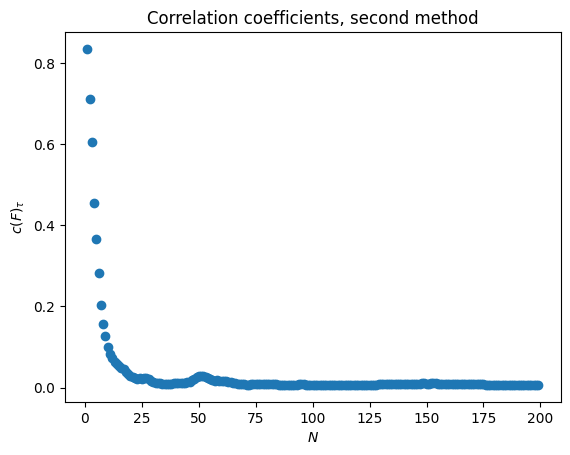

In [65]:
# Plot coefficienti di correlazione, secondo metodo

plt.scatter(range(1,numtau),cftau_check[1:])
plt.title('Correlation coefficients, second method')
plt.xlabel(r'$N$')
plt.ylabel(r'$c(F)_{\tau}$')

Text(0, 0.5, '$c(F)_{\\tau}$')

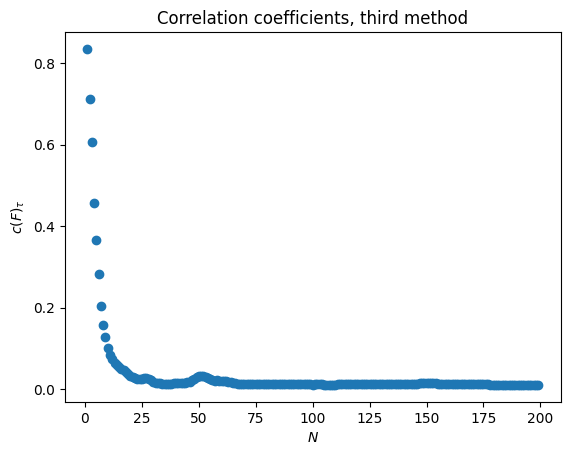

In [66]:
# Plot coefficienti di correlazione, terzo metodo

plt.scatter(range(1,numtau),cftau_check2[1:])
plt.title('Correlation coefficients, third method')
plt.xlabel(r'$N$')
plt.ylabel(r'$c(F)_{\tau}$')

Text(0, 0.5, '$\\langle H \\rangle$')

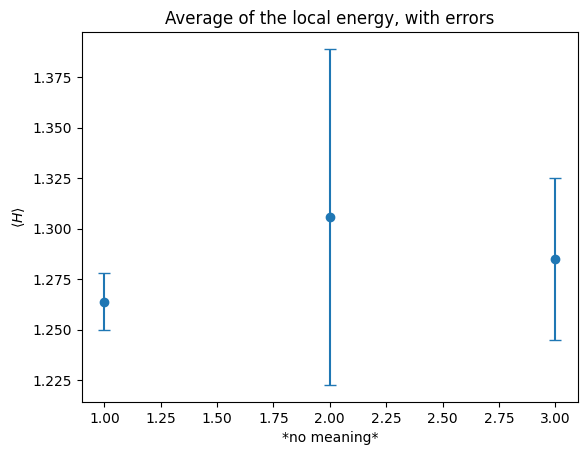

In [69]:
# Plot dei valori di energia media con le barre di errore

ave_E_l = [f_ave, f_ave_check, f_ave_check2]
err_E_l = [3*f_err, 3*f_err_check, 3*f_err_check2]
x = [1,2,3]

plt.errorbar(x, ave_E_l , yerr=err_E_l, fmt='o', capsize=4)

plt.title('Average of the local energy, with errors')
plt.xlabel('*no meaning*')
plt.ylabel(r'$\langle H \rangle$')

## Derivative test
In this section we find the best values of $\alpha$ and $\beta$ that minimize the energy.
In order to do that, we find the derivative of the energy as function of $\alpha$ and $\beta$. Differentiating with respect to $\alpha$, for instance, we get:
$$
\frac{\partial{E}}{\partial \alpha} = \frac{\partial}{\partial \alpha} \frac{\int \psi H \psi}{\int \psi ^2} = \frac{\int \psi ' H \psi}{\int \psi ^2} + \frac{\int \psi H \psi '}{\int \psi ^2} - 2 \frac{\int \psi H \psi}{\int \psi ^2} \frac{\int \psi '\psi}{\int \psi ^2} = 2 \left\langle E_{L}\frac{\psi '}{\psi} \right\rangle -2 \braket{E_{L}} \left\langle \frac{\psi '}{\psi} \right\rangle
$$
where $\psi ' =  \frac{\partial{\psi}}{\partial \alpha}$ and $E_{L} = \frac{H\psi}{\psi}$ is the local energy and the average $\braket{...}$ is
over a set of configurations generated with the Metropolis algorithm. This derivative has to be: $\frac{\partial{E}}{\partial \alpha} \approx 0$. We exploit the same procedure for $\beta$. We vary $\alpha$ and $\beta$ by hand until reaching the previous condition for the correspondin derivatives.
In this way we find, for the first method of computing the energy, that $\alpha = a_{0} - 0.445 \AA$ minimize the energy $\braket{H_{1}} = 1.239$ K and the derivative: $\frac{\partial{E}}{\partial \alpha} = 0.01$.
We also find that $\beta = \sigma - 0.075 \AA$ minimize the energy: $\braket{H_{1}} = 1.259$ K and the derivative: $\frac{\partial{E}}{\partial \beta} = 0.07$. 

In [45]:
# Modi per calcolare l'energia locale

alpha = a0
beta = sigma

def kinetic_term(x1,y1,z1,x2,y2,z2):
    r1 = x1**2 + y1**2 + z1**2
    r2 = x2**2 + y2**2 + z2**2
    r_diff = ( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )**0.5
    factor = 10 * beta**5 / (alpha**2 * r_diff**5)
    risultato = (1/alpha**2) * ((r1+r2)/alpha**2 - 6) - factor + ((10 * beta**5) / r_diff**7) * ((5*beta**5)/r_diff**5 -4 )
    return risultato

def first_part(x1,y1,z1,x2,y2,z2):
    r1 = x1**2 + y1**2 + z1**2
    r2 = x2**2 + y2**2 + z2**2
    r_diff = ( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )**0.5
    factor = 10 * beta**5 / (alpha**2 * r_diff**5)
    risultato = 50 * beta**10 / (r_diff**12) + (r1+r2)/(alpha**4) - factor 
    return risultato

def second_part(x1,y1,z1,x2,y2,z2):
    r_diff = ( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )**0.5
    risultato = - 6 / alpha**2 - 40 * beta**5 / r_diff**7
    return risultato

In [ ]:
# Energia locale per il nuovo valore di alpha trovato sotto

x0 = 0
delta = 0.4
alpha = a0 - 0.445
beta = sigma
Nstep = 1000000
E_l_2 = np.zeros(Nstep)
x1 = np.zeros(Nstep)
y1 = np.zeros(Nstep)
z1 = np.zeros(Nstep)
x2 = np.zeros(Nstep)
y2 = np.zeros(Nstep)
z2 = np.zeros(Nstep)
psi_vec = np.zeros(Nstep)
ratio_psi = np.zeros(Nstep)
x1[0] = x0
y1[0] = x0
z1[0] = x0
x2[0] = x0 + 3.896
y2[0] = x0 + 3.896
z2[0] = x0 + 3.896

for i in range(Nstep-1):
    x1_prop = x1[i] + delta * (uniform(0,1)-0.5)
    y1_prop = y1[i] + delta * (uniform(0,1)-0.5)
    z1_prop = z1[i] + delta * (uniform(0,1)-0.5)
    x2_prop = x2[i] + delta * (uniform(0,1)-0.5)
    y2_prop = y2[i] + delta * (uniform(0,1)-0.5)
    z2_prop = z2[i] + delta * (uniform(0,1)-0.5)

    psi0 = (-(x1[i]**2 + y1[i]**2 + z1[i]**2 + x2[i]**2 + y2[i]**2 + z2[i]**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1[i] - x2[i])**2 + (y1[i] - y2[i])**2 +(z1[i] - z2[i])**2 )**2.5))
    psi = (-(x1_prop**2 + y1_prop**2 + z1_prop**2 + x2_prop**2 + y2_prop**2 + z2_prop**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1_prop - x2_prop)**2 + (y1_prop - y2_prop)**2 +(z1_prop - z2_prop)**2 )**2.5))
        
    ratio = np.exp(psi-psi0)
    if(ratio<1):
        p=ratio
    else: 
        p=1

    epsilon = 1e-8   
    max = 1-epsilon 

    eta_x1 = uniform(0,max)
    if(p>eta_x1):
        x1[i+1] = x1_prop
    else:
        x1[i+1] = x1[i]  

    eta_y1 = uniform(0,max)
    if(p>eta_y1):
        y1[i+1] = y1_prop
    else:
        y1[i+1] = y1[i]  

    eta_z1 = uniform(0,max)
    if(p>eta_z1):
        z1[i+1] = z1_prop
    else:
        z1[i+1] = z1[i]    

    eta_x2 = uniform(0,max)
    if(p>eta_x2):
        x2[i+1] = x2_prop
    else:
        x2[i+1] = x2[i]

    eta_y2 = uniform(0,max)
    if(p>eta_y2):
        y2[i+1] = y2_prop
    else:
        y2[i+1] = y2[i]   

    eta_z2 = uniform(0,max)
    if(p>eta_z2):
        z2[i+1] = z2_prop
    else:
        z2[i+1] = z2[i]
    
    ratio_psi[i] = (x1[i]**2 + y1[i]**2 + z1[i]**2 + x2[i]**2 + y2[i]**2 + z2[i]**2)/alpha**3

    E_l_2[i] = - prefactor_kin * kinetic_term(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i]) + \
        v_ext(x1[i],y1[i],z1[i]) + v_ext(x2[i],y2[i],z2[i]) + v_LJ(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])

    print(i)

In [47]:
# Energia media e derivata rispetto ad alpha 

f_ave = sum(E_l_2)/Nstep
ratio_psi_ave = sum(ratio_psi)/Nstep
f_ratio_psi = ratio_psi * E_l_2
f_ratio_psi_ave = sum(f_ratio_psi)/Nstep
derivative_E_alpha = 2 * f_ratio_psi_ave - 2 * f_ave * ratio_psi_ave

print('The average energy with the new value of alpha is',f_ave)
print('The derivative with respect to alpha is', derivative_E_alpha)

The average energy with the new value of alpha is 1.2393568976316391
The derivative with respect to alpha is 0.013470627239673849


In [ ]:
# Energia locale per il nuovo valore di alpha trovato sotto

x0 = 0
delta = 0.4
alpha = a0
beta = sigma - 0.075
Nstep = 1000000
E_l_2 = np.zeros(Nstep)
x1 = np.zeros(Nstep)
y1 = np.zeros(Nstep)
z1 = np.zeros(Nstep)
x2 = np.zeros(Nstep)
y2 = np.zeros(Nstep)
z2 = np.zeros(Nstep)
psi_vec = np.zeros(Nstep)
ratio_psi_beta = np.zeros(Nstep)
x1[0] = x0
y1[0] = x0
z1[0] = x0
x2[0] = x0 + 3.896
y2[0] = x0 + 3.896
z2[0] = x0 + 3.896

for i in range(Nstep-1):
    x1_prop = x1[i] + delta * (uniform(0,1)-0.5)
    y1_prop = y1[i] + delta * (uniform(0,1)-0.5)
    z1_prop = z1[i] + delta * (uniform(0,1)-0.5)
    x2_prop = x2[i] + delta * (uniform(0,1)-0.5)
    y2_prop = y2[i] + delta * (uniform(0,1)-0.5)
    z2_prop = z2[i] + delta * (uniform(0,1)-0.5)

    psi0 = (-(x1[i]**2 + y1[i]**2 + z1[i]**2 + x2[i]**2 + y2[i]**2 + z2[i]**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1[i] - x2[i])**2 + (y1[i] - y2[i])**2 +(z1[i] - z2[i])**2 )**2.5))
    psi = (-(x1_prop**2 + y1_prop**2 + z1_prop**2 + x2_prop**2 + y2_prop**2 + z2_prop**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1_prop - x2_prop)**2 + (y1_prop - y2_prop)**2 +(z1_prop - z2_prop)**2 )**2.5))
        
    ratio = np.exp(psi-psi0)
    if(ratio<1):
        p=ratio
    else: 
        p=1

    epsilon = 1e-8   
    max = 1-epsilon 

    eta_x1 = uniform(0,max)
    if(p>eta_x1):
        x1[i+1] = x1_prop
    else:
        x1[i+1] = x1[i]  

    eta_y1 = uniform(0,max)
    if(p>eta_y1):
        y1[i+1] = y1_prop
    else:
        y1[i+1] = y1[i]  

    eta_z1 = uniform(0,max)
    if(p>eta_z1):
        z1[i+1] = z1_prop
    else:
        z1[i+1] = z1[i]    

    eta_x2 = uniform(0,max)
    if(p>eta_x2):
        x2[i+1] = x2_prop
    else:
        x2[i+1] = x2[i]

    eta_y2 = uniform(0,max)
    if(p>eta_y2):
        y2[i+1] = y2_prop
    else:
        y2[i+1] = y2[i]   

    eta_z2 = uniform(0,max)
    if(p>eta_z2):
        z2[i+1] = z2_prop
    else:
        z2[i+1] = z2[i]
    
    ratio_psi_beta[i] = - 5 * beta**4 / (( (x1[i] - x2[i])**2 + (y1[i] - y2[i])**2 + (z1[i] - z2[i])**2 )**2.5)

    E_l_2[i] = - prefactor_kin * kinetic_term(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i]) + \
        v_ext(x1[i],y1[i],z1[i]) + v_ext(x2[i],y2[i],z2[i]) + v_LJ(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])

    print(i)

In [49]:
# Energia media e derivata rispetto a beta

f_ave = sum(E_l_2)/Nstep
ratio_psi_beta_ave = sum(ratio_psi_beta)/Nstep
f_ratio_psi_beta = ratio_psi_beta * E_l_2
f_ratio_psi_beta_ave = sum(f_ratio_psi_beta)/Nstep
derivative_E_beta = 2 * f_ratio_psi_beta_ave - 2 * f_ave * ratio_psi_beta_ave

print('The average energy is',f_ave)
print('The derivative with respect to beta is',derivative_E_beta)

The average energy is 1.2590067684928583
The derivative with respect to beta is 0.06541870453770106


Finally, we run the simulation for a last time with the new values of both $\alpha$ and $\beta$, to find the minimized energy.

In [ ]:
# Energia locale per i nuovi valori di alpha e beta

x0 = 0
delta = 0.4
alpha = a0 - 0.445
beta = sigma - 0.075
Nstep = 1000000
E_l_2 = np.zeros(Nstep)
x1 = np.zeros(Nstep)
y1 = np.zeros(Nstep)
z1 = np.zeros(Nstep)
x2 = np.zeros(Nstep)
y2 = np.zeros(Nstep)
z2 = np.zeros(Nstep)
psi_vec = np.zeros(Nstep)
ratio_psi_beta = np.zeros(Nstep)
x1[0] = x0
y1[0] = x0
z1[0] = x0
x2[0] = x0 + 3.896
y2[0] = x0 + 3.896
z2[0] = x0 + 3.896

for i in range(Nstep-1):
    x1_prop = x1[i] + delta * (uniform(0,1)-0.5)
    y1_prop = y1[i] + delta * (uniform(0,1)-0.5)
    z1_prop = z1[i] + delta * (uniform(0,1)-0.5)
    x2_prop = x2[i] + delta * (uniform(0,1)-0.5)
    y2_prop = y2[i] + delta * (uniform(0,1)-0.5)
    z2_prop = z2[i] + delta * (uniform(0,1)-0.5)

    psi0 = (-(x1[i]**2 + y1[i]**2 + z1[i]**2 + x2[i]**2 + y2[i]**2 + z2[i]**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1[i] - x2[i])**2 + (y1[i] - y2[i])**2 +(z1[i] - z2[i])**2 )**2.5))
    psi = (-(x1_prop**2 + y1_prop**2 + z1_prop**2 + x2_prop**2 + y2_prop**2 + z2_prop**2)/(alpha**2)) + \
            (-2*beta**5/(( (x1_prop - x2_prop)**2 + (y1_prop - y2_prop)**2 +(z1_prop - z2_prop)**2 )**2.5))
        
    ratio = np.exp(psi-psi0)
    if(ratio<1):
        p=ratio
    else: 
        p=1

    epsilon = 1e-8   
    max = 1-epsilon 

    eta_x1 = uniform(0,max)
    if(p>eta_x1):
        x1[i+1] = x1_prop
    else:
        x1[i+1] = x1[i]  

    eta_y1 = uniform(0,max)
    if(p>eta_y1):
        y1[i+1] = y1_prop
    else:
        y1[i+1] = y1[i]  

    eta_z1 = uniform(0,max)
    if(p>eta_z1):
        z1[i+1] = z1_prop
    else:
        z1[i+1] = z1[i]    

    eta_x2 = uniform(0,max)
    if(p>eta_x2):
        x2[i+1] = x2_prop
    else:
        x2[i+1] = x2[i]

    eta_y2 = uniform(0,max)
    if(p>eta_y2):
        y2[i+1] = y2_prop
    else:
        y2[i+1] = y2[i]   

    eta_z2 = uniform(0,max)
    if(p>eta_z2):
        z2[i+1] = z2_prop
    else:
        z2[i+1] = z2[i]
    
    ratio_psi_beta[i] = - 5 * beta**4 / (( (x1[i] - x2[i])**2 + (y1[i] - y2[i])**2 + (z1[i] - z2[i])**2 )**2.5)

    E_l_2[i] = - prefactor_kin * kinetic_term(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i]) + \
        v_ext(x1[i],y1[i],z1[i]) + v_ext(x2[i],y2[i],z2[i]) + v_LJ(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i])

    print(i)

In [51]:
# Energia media con i nuovi valori al alpha e beta

f_ave = sum(E_l_2)/Nstep
print('The average energy is',f_ave)

The average energy is 1.2199038329410992


So we get an energy of 1.220 K, which is lower than the one computed with the same method for the local energy but based on the original values of $\alpha$ and $\beta$, namely 1.263 K.